<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Hypothesis Testing

<a id="introduction-to-hypothesis-testing"></a>
**Objective**: Test a hypothesis within a sample case study.

After taking a random sample at Acme, men on average spend `$ 60`. Women on average spend `$ 70`. Are these two numbers **significantly different**?
- Do we have enough information to know (No, we don't).
- Are these findings indicative of a real trend, or are they by chance.

For example, if we are working on sales data, how would we know if there was a difference between the buying patterns of men and women at Acme, Inc.? **Hypothesis testing!**

> **Note:** In this course, hypothesis testing is primarily used to assess foundational models such as linear and logistic regression.

## Hypothesis Testing Steps

Generally speaking, we start with a **null hypothesis** and an **alternative hypothesis**, which is the opposite of the null. Then, you check whether the data support rejecting your null hypothesis or fail to reject the null hypothesis.

For example:

- **Null hypothesis**: There is no relationship between gender and sales.
- **Alternative hypothesis**: There is a relationship between gender and sales.

Note that "failing to reject" the null hypothesis is not the same as "accepting" it. Your alternative hypothesis may indeed be true, but you don't necessarily have enough data to show that yet.

This distinction is important for helping you avoid overstating your findings. You should only state what your data and analysis can truly represent.

$H_0: $ Boring thing you want to disprove

$H_A: $ Interesting thing

<a id="validate-your-findings"></a>
## Validate Your Findings

#### How Do We Tell if the Association We Observed is Statistically Significant?

**Statistical significance** is whether or not a result or relationship is caused by something other than mere random chance. Statistical hypothesis testing is traditionally employed to determine whether or not a result is statistically significant.

We might ask: **How likely is the effect observed to be true, assuming the null hypothesis is true?** If the probability of our observation occurring by chance is less than 5 percent (supposing the null hypothesis), then we reject the null hypothesis. _(Note that the 5 percent value is in many ways arbitrary)._

The probability of our observations occurring by chance, given the null hypothesis, is the **p-value** ($p$).

---

**Example:** Suppose you flip a coin three times and get three heads in a row. These three flips are our observations.

+ We want to know whether or not the coin is fair. So, we select the **null hypothesis:**
<br><br>
$$H_0: \text{The coin is fair.}$$
<br>
+ Now, let's suppose the null hypothesis is true. Three heads in a row occurs with a chance of $1/2^3 \approx 12.5\%$.
+ Because there is a reasonable ($> 5\%$) chance of three heads occuring naturally, we do not reject the null hypothesis.
+ So, **we conclude** that we do not have enough data to tell whether or not the coin is fair ($p = 0.125$).

---

In other words, we say that something is NOT statistically significant if there is a less than 5 percent chance that our finding was caused by chance alone (assuming the null hypothesis is true).

However, suppose that we flipped the coin ten times and received all 10 heads. The probability of this occuring is $1/2^{10} = 1/1024$, which is below $5\%$. In this case, we **would reject the null hypothesis and conclude the coin is unfair**.

Hopefully the logic shines through here:
- 3 heads in a row isn't rare. It can happen.
- 10 heads in a row is extremely unlikely. I'd believe the coin was unfair.

## Example: Acme Shopping

In [4]:
ord("*") #ascii

42

In [6]:
!ls *

01-correlation-and-causation.ipynb
02-bias-and-sampling.ipynb
03-hypothesis-testing.ipynb
README.md

assets:
french-fry.pdf
images

drawings:
boxplot-lesson.png
error-types.png

practice:
eda-music_data_blogging-lab-master
eda-telecomm_group_project-lab-master

solution-code:
experiments-hypothesis-tests_solutions.ipynb


In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

%matplotlib inline

In [3]:
# Generating Data
np.random.seed(123)
df_m = pd.DataFrame({
    'sex': 'M',
    'amount': np.random.normal(loc=60, scale=3, size=100)
})

df_f = pd.DataFrame({
    'sex': 'F',
    'amount': np.random.normal(loc=70, scale=4, size=100)
})

df = pd.concat([df_m, df_f], axis=0)
df.head()

,sex,amount
0,M,56.743108
1,M,62.992036
2,M,60.848935
3,M,55.481116
4,M,58.264199


In [7]:
df.tail()

,sex,amount
95,F,57.075780
96,F,68.922826
97,F,69.556597
98,F,68.634953
99,F,69.128215


In [10]:
df.loc[0]

,sex,amount
0,M,56.743108
0,F,72.568219


In [11]:
df.iloc[0]

sex             M
amount    56.7431
Name: 0, dtype: object

In [12]:
df.shape

(200, 2)

$H_0: $ Spending habits between M and F are the same.

$H_A: $ Spending habits between M and F are different.

$H_0: \mu_M = \mu_F$

$H_A: \mu_M \ne \mu_F$

#### Research Question:
Are the spending amounts of men and women different at Acme?

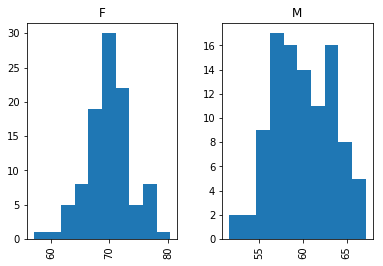

In [13]:
# Plot the data for each sex. What do you see?
df.hist(column='amount', by='sex');

<a id="statistical-tests"></a>
### Statistical Tests

There are a few good statistical tests for A/B testing:
* [ANOVA](https://en.wikipedia.org/wiki/Analysis_of_variance)
* [Welch's t-test](https://en.wikipedia.org/wiki/Welch's_t-test)
* [Mann-Whitney test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)

**Each test makes various assumptions:**
* ANOVA assumes the residuals are normally distributed and data have equal variances.
* The Welch t-test assumes normal distributions but not necessarily equal variances and more effectively accounts for small sample sizes.
* The Mann-Whitney test assumes nothing about the distributions but requires at least 20 data points in each set, producing a weaker p value.

Typically you need to choose the most appropriate test. Tests that make more assumptions are more discriminating (producing stronger p values) but can be misleading with data sets that don't satisfy the assumptions.

#### Let's formulate a hypothesis test:
$$ H_0 : ???$$
$$ H_A : ???$$

In [14]:
from scipy.stats import ttest_ind

In [15]:
df.head()

,sex,amount
0,M,56.743108
1,M,62.992036
2,M,60.848935
3,M,55.481116
4,M,58.264199


In [16]:
# Carry out a t-test
female = df.loc[df['sex'] == 'F', 'amount']
male = df.loc[df['sex'] == 'M', 'amount']
tt = ttest_ind(female, male, equal_var=False)

In [19]:
female.head()

0    72.568219
1    62.088448
2    72.849059
3    80.393216
4    69.901496
Name: amount, dtype: float64

In [20]:
male.head()

0    56.743108
1    62.992036
2    60.848935
3    55.481116
4    58.264199
Name: amount, dtype: float64

In [17]:
tt.statistic

19.01566722125751

In [18]:
tt.pvalue

3.0776387920984846e-46

In [21]:
# Make a conclusion
if tt.pvalue < 0.05:
    print("REJECT H0")
else:
    print("FAIL TO REJECT H0")

REJECT H0


Because our p-value is less than $\alpha$, we reject the null hypothesis and conclude that on average, women spend more than men at Acme.

<a id="error-types"></a>
## Error Types

Statisticians often classify errors not just as errors but as one of two specific types of errors — type I and type II.

+ **Type I errors** are false positives.
    - Machine learning: Our model falsely predicts "positive." (The prediction is incorrect.)
    - Statistics: Incorrect rejection of a true null hypothesis.
    - Pregnent example old man is pregnant. The boy who called wolf.


+ **Type II errors** are false negatives.
    - Machine learning: Our model falsely predicts "negative." (The prediction is incorrect.)
    - Statistics: Incorrectly retaining a false null hypothesis.
    - Pregnent example very preg. woman. The boy who called wolf.

Understanding these errors can be especially beneficial when designing models. For example, we might decide that type I errors are OK but type II errors are not. We can then optimize our model appropriately.

> **Example:** Suppose we make a model for airline security in which we predict whether or not a weapon is present ("positive"). In this case, we would much rather have type I errors (falsely predict a weapon) than type II errors (falsely predict no weapon).

> **Example:** Suppose we make a model for the criminal justice system in which we whether or not a defendant is guilty ("positive"). In this case, we would much rather have type II errors (falsely predict innocent) than type I errors (falsely predict guilty).

Can you phrase these examples in terms of null hypotheses?

<a id="confidence-intervals"></a>
## Confidence Intervals

A closely related concept is **confidence intervals**. A 95 percent confidence interval can be interpreted like so: under infinite sampling of the population, we would expect that the true value of the parameter we are estimating to fall within that range 95% of the time.

## **Tim: Draw pictures of this! Hard to explain in words.**

Keep in mind that we only have a **single sample of data** and not the **entire population of the data**. The "true" effect/difference is either within this interval or it is not. We have no firm knowledge, however, that our single estimate of the "true" effect/difference is close or not to the "truth". The confidence interval around our estimate tells us, with a given sample size and level of confidence, the range in which future estimates are likely to fall.

Note that using 95 percent confidence intervals is just a convention. You can create 90 percent confidence intervals (which will be more liberal), 99 percent confidence intervals (which will be more conservative), or whatever intervals you prefer.


## Conclusions/Summary

* **Hypothesis Testing**: What is it used for?
    - It's often used for _differentiating things_. Today we used it to tell apart two categories. We'll soon use HTs for anothe purpose: model selection.
* **Confidence Intervals**: What are they used for?
    - Giving ranges of feasible values. When HTs answer yes/no questions, CIs answer open-ended, quantitative ones.